In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import heapq
from sklearn.datasets import make_blobs
import math
import copy

In [15]:
class KDNode:
    def __init__(self, point, axis, left=None, right=None):
        self.point = point
        self.axis = axis
        self.left = left
        self.right = right

class KDTree:
    def __init__(self):
        self.root = None

    def build(self, points, depth=0):
        if not points:
            return None
        
        k = len(points[0])  # Dimensionality of the data
        axis = depth % k

        # Sort points by the current axis and choose the median as the pivot
        points.sort(key=lambda x: x[axis])
        median = len(points) // 2

        return KDNode(
            point=points[median],
            axis=axis,
            left=self.build(points[:median], depth + 1),
            right=self.build(points[median + 1:], depth + 1)
        )

    def insert(self, point):
        def _insert_rec(node, point, depth=0):
            if node is None:
                k = len(point)
                return KDNode(point, depth % k)
            
            if point[node.axis] < node.point[node.axis]:
                node.left = _insert_rec(node.left, point, depth + 1)
            else:
                node.right = _insert_rec(node.right, point, depth + 1)
            
            return node

        self.root = _insert_rec(self.root, point)


In [16]:
def ith_nearest_neighbor(tree, query_point, i):
    """Find the ith nearest neighbor of the given point using a set to track visited nodes."""
    if tree.root is None:
        return None

    # Priority queue to maintain i nearest neighbors
    neighbors = []
    
    # Set to track visited nodes
    visited = set()

    def _search(node):
        if node is None or node in visited:
            return

        visited.add(node)

        # Calculate distance from the current node to the query point
        distance = sum([(a - b) ** 2 for a, b in zip(node.point, query_point)]) ** 0.5

        # If we have less than i neighbors, just add the current node
        if len(neighbors) < i:
            heapq.heappush(neighbors, (-distance, node.point))
        else:
            # If the current node is closer than the farthest neighbor, update the queue
            if distance < -neighbors[0][0]:
                heapq.heappop(neighbors)
                heapq.heappush(neighbors, (-distance, node.point))

        axis = node.axis
        next_branch = None
        opposite_branch = None

        if query_point[axis] < node.point[axis]:
            next_branch = node.left
            opposite_branch = node.right
        else:
            next_branch = node.right
            opposite_branch = node.left

        # Recursively search the half of the tree that contains the test point
        _search(next_branch)

        # If difference between splitting coordinate and test point's coordinate is
        # less than the distance from test point to the farthest neighbor, search the other half
        if (len(neighbors) < i or
                abs(query_point[axis] - node.point[axis]) < -neighbors[0][0]):
            _search(opposite_branch)

    _search(tree.root)

    # Return the i-th nearest neighbor
    return neighbors[0][1]




In [17]:
def dck(tree, points):    
    k = 2
    Nb = {pt:0 for pt in points}
    # count num of 0s in Nb
    NN = {pt:set() for pt in points}
    RNN = {pt:set() for pt in points}
    NaN = {pt:set() for pt in points}

    while True:
        zeros_in_Nb = sum(1 for value in Nb.values() if value == 0)
        for pointi in points:
            pointj = ith_nearest_neighbor(tree, pointi, k)
            
            if pointj not in NN[pointi]:
                NN[pointi].add(pointj)
                RNN[pointj].add(pointi)
                Nb[pointj] += 1
            # print(Nb , NN , RNN) 
        new_zeros_in_Nb = sum(1 for value in Nb.values() if value == 0)
        if new_zeros_in_Nb == zeros_in_Nb:
            break
        k += 1
    return k


In [18]:
def findkval(points):
    tree = KDTree()
    tree.root = tree.build(points)
    dckval = dck(tree, points)
    return dckval
    

In [19]:
for ns in [50 , 500 , 5000 , 50000 , 500000]:
    X, Y = make_blobs(n_samples=ns, centers=5, random_state=42, cluster_std=[0.5, 0.7, 0.9, 1.2, 1.5])
    points = [(x,y) for x,y in X]
    print("for n_samples = " , ns , " dck = " , findkval(points))

for n_samples =  50  dck =  6
for n_samples =  500  dck =  7
for n_samples =  5000  dck =  11
for n_samples =  50000  dck =  11


KeyboardInterrupt: 

In [22]:
for ns in [50 , 500 , 5000 , 50000 , 500000 , 5000000]:
    X, Y = make_blobs(n_samples=ns,  random_state=42)
    points = [(x,y) for x,y in X]
    print("for no of points = " , str(ns).zfill(7) , " value of k = " , findkval(points))

for no of points =  0000050  value of k =  7
for no of points =  0000500  value of k =  10
for no of points =  0005000  value of k =  10
for no of points =  0050000  value of k =  10
for no of points =  0500000  value of k =  14
for no of points =  5000000  value of k =  14


In [27]:
for ns in [10 , 100 , 1000 , 10000 , 100000] :
    for nc in [5 , 10 ,20 , 30 , 40 , 50 , 100 , 500 , 1000 , 5000 ]:
        if ns < nc:
            continue
        X, Y = make_blobs(n_samples=ns, centers=nc,  random_state=42)
        points = [(x,y) for x,y in X]
        print("pointcount = " ,str(ns).zfill(6) , " | clusterscount = " , str(nc).zfill(4) , " |value of k = " , findkval(points))

pointcount =  000010  | clusterscount =  0005  |value of k =  3
pointcount =  000010  | clusterscount =  0010  |value of k =  4
pointcount =  000100  | clusterscount =  0005  |value of k =  7
pointcount =  000100  | clusterscount =  0010  |value of k =  7
pointcount =  000100  | clusterscount =  0020  |value of k =  6
pointcount =  000100  | clusterscount =  0030  |value of k =  7
pointcount =  000100  | clusterscount =  0040  |value of k =  8
pointcount =  000100  | clusterscount =  0050  |value of k =  7
pointcount =  000100  | clusterscount =  0100  |value of k =  6
pointcount =  001000  | clusterscount =  0005  |value of k =  8
pointcount =  001000  | clusterscount =  0010  |value of k =  9
pointcount =  001000  | clusterscount =  0020  |value of k =  10
pointcount =  001000  | clusterscount =  0030  |value of k =  11
pointcount =  001000  | clusterscount =  0040  |value of k =  8
pointcount =  001000  | clusterscount =  0050  |value of k =  8
pointcount =  001000  | clusterscount 

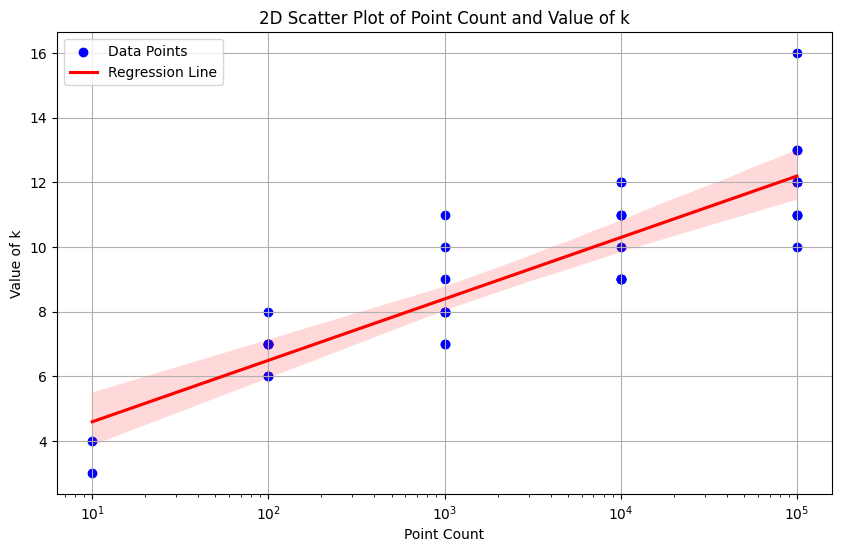

In [30]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating the DataFrame from the provided data
data = {
    'Point Count': [10, 10, 100, 100, 100, 100, 100, 100, 100, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
                    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 100000, 100000, 100000, 
                    100000, 100000, 100000, 100000, 100000, 100000, 100000],
    'Clusters Count': [5, 10, 5, 10, 20, 30, 40, 50, 100, 5, 10, 20, 30, 40, 50, 100, 500, 1000, 5, 10, 20, 30, 40, 50,
                       100, 500, 1000, 5000, 5, 10, 20, 30, 40, 50, 100, 500, 1000, 5000],
    'Value of k': [3, 4, 7, 7, 6, 7, 8, 7, 6, 8, 9, 10, 11, 8, 8, 8, 7, 7, 9, 9, 11, 10, 11, 11, 12, 12, 9, 9, 11, 11,
                   12, 16, 10, 13, 12, 13, 11, 12]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Point Count'], df['Value of k'], c='blue', label='Data Points')
plt.xlabel('Point Count')
plt.ylabel('Value of k')
plt.title('2D Scatter Plot of Point Count and Value of k')
plt.xscale('log')  # Log scale for better visualization
plt.grid(True)

# Adding a regression line
sns.regplot(x='Point Count', y='Value of k', data=df, logx=True, scatter=False, color='red', label='Regression Line')

plt.legend()
plt.show()
